# Titanic Dataset #

This dataset consist of people who where on the titanic during the tragedy day. Each individual is represent by a set of features. \
Based upon this feature, this task of this dataset is to predict whether the individual will survive or not. 

## Preprocessing the dataset ##

Here we will preprocess the dataset: dropping non-informative columns, encoding the categorical columns, and scaling the data

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('datasets/titanic.csv')
data = data.drop(['name'], axis = 1)

data_label = data['survived']
data_feature = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

x_train, x_test, y_train, y_test = train_test_split(data_feature, data_label, test_size=0.33)

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse_output=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train

x_train_NOT_numpy = x_train

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Testing the Logistic Regression # 

Here we will test the logistic regression against two optimizers: evolutionary based and gradient based

In [6]:
import sys
sys.path.append('..')  
from evo_learn.logistic_regression import LogisticRegression

## Gradient Based Optimizer ## 

Let's define the classifier, and train it.

In [31]:
clf = LogisticRegression()
clf.fit(x_train, y_train, max_iterations=1000, gradient_optimizer=True)
w = clf.get_weights()

The classification report as follows

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       280
           1       0.59      0.66      0.62       152

    accuracy                           0.72       432
   macro avg       0.69      0.70      0.70       432
weighted avg       0.73      0.72      0.72       432



The ROC curve with corresponding AUC score

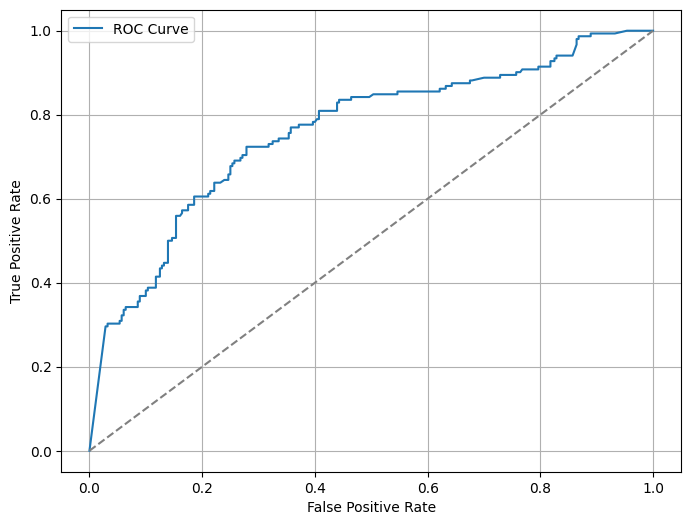

AUC Score for Gradient-Based Optimizer: 0.7598801691729323


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
predictions_proba = clf.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, predictions_proba)

fig = plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='dashed', color = 'gray')
plt.legend()
plt.show()
print(f'AUC Score for Gradient-Based Optimizer: {roc_auc_score(y_test, predictions_proba)}')


## Evolutionary Based Optimizer ## 

Let's define the new classifier and fit it with evolutionary optimizer

In [26]:
clf = LogisticRegression()
clf.fit(x_train, y_train, max_iterations=250, gradient_optimizer=False, num_runs=5)
w = clf.get_weights()

Iteration: 1, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, 0.00647, -0.02173, -0.0723], Fitness: 11.289755853519386
Iteration: 2, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, 0.00647, -0.02173, -0.0723], Fitness: 11.289755853519386
Iteration: 3, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, -37900.0, 447.8, 309.5], Fitness: 5.697388419238066
Iteration: 4, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, -37900.0, 447.8, 309.5], Fitness: 5.697388419238066
Iteration: 5, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, -37900.0, 447.8, 309.5], Fitness: 5.697388419238066
Iteration: 6, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, -37900.0, 447.8, 309.5], Fitness: 5.697388419238066
Iteration: 7, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, -37900.0, 447.8, 309.5], Fitness: 5.697388419238066
Iteration: 8, Queen: [0.1015, 9.423e-05, 1746.0, 9270.0, -0.782, -8290.0, -37900.0, 447.8, 309.5], Fitness: 

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       280
           1       0.75      0.73      0.74       152

    accuracy                           0.82       432
   macro avg       0.80      0.80      0.80       432
weighted avg       0.82      0.82      0.82       432



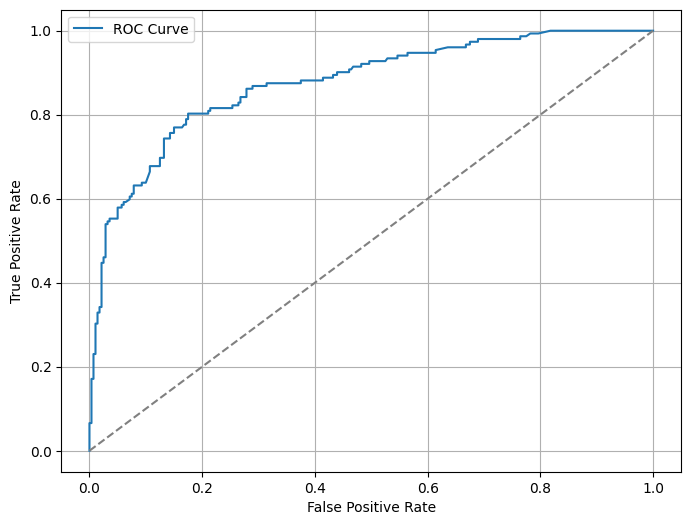

AUC Score for Gradient-Based Optimizer: 0.8742598684210527


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
predictions_proba = clf.predict_proba(x_test)

fpr, tpr, threshold = roc_curve(y_test, predictions_proba)

fig = plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='dashed', color = 'gray')
plt.legend()
plt.show()
print(f'AUC Score for Gradient-Based Optimizer: {roc_auc_score(y_test, predictions_proba)}')


# Conclusion #



- As seen, the Evolutionary based optimizer hardly outperforms the gradient-based optimizer. The difference between AUC scores is in range of 0.10
- However, Evolutionary Algorithms also take a lot of time to find weights, while Gradient Based optimizer found it immediately
